<a href="https://www.kaggle.com/code/mkanothe/resnet-18-to-identify-classify-vegetables?scriptVersionId=155294204" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import socket,warnings
import os



try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex:
    raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

from duckduckgo_search import ddg_images
from fastcore.all import *

In [2]:
print("Start.")

Start.


The following `search_images()` function is used to search images on duck-duck-go through fast ai library.

In [3]:
def search_images(term, max_images=30):
    print(f"Search for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [4]:
??DDG

Object `DDG` not found.


Let's search for some vegetables.

Basically, we are creating a model that can recognize various vegetables.
1. The basic step is to create a model that can tell if an image is a specific vegetable, e.g. spinach, cabbage etc

We will aim for each of these vegetables:
Leafy green: Lettuce, spinach, silverbeet, cabbage, arugula, coriander leaves, mint, and spring onion
Cruciferous: Broccoli, Brussels sprouts, cauliflower, and cabbage
Marrow: Pumpkin, cucumber, and zucchini
Root: Potato, sweet potato, yam, beets, carrots, radishes, turnips, parsnip, rutabaga, and beetroot
Edible plant stem: Celery and asparagus
Allium: Onion, garlic, and shallot
Bulb: Garlic, chive, spring onion, water chestnut, grey shallot, leeks, and other varieties of onions
Flower: Cauliflower, broccoli, and artichokes
Tuber: Potato, ginger, and turmeric
Fruit: Cucumber, pumpkin, tomato, and capsicum

Current List (training on these):
- lettuce
- spinach
- cabbage
- brocolli
- kale

Start by searching for each of these vegetables.

In [5]:
lettuce_urls = search_images('Lettuce photos', max_images=3)
lettuce_urls[2]

Search for 'Lettuce photos'


/opt/conda/lib/python3.10/site-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


'https://media4.s-nbcnews.com/j/newscms/2018_01/2281616/180104-romaine-lettuce-mn-0820_ec72c6630954ef7497ec89130e8dc742.nbcnews-ux-2880-1000.jpg'

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


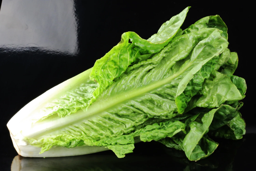

In [6]:
from fastdownload import download_url

destination = 'test-lettuce.jpg'
download_url(lettuce_urls[2], dest=destination, show_progress=False)

from fastai.vision.all import *

lettuce_img = Image.open(destination)
lettuce_img.to_thumb(256,256)

Search for 'Spinach transparent photos'


/opt/conda/lib/python3.10/site-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


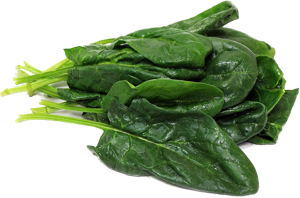

In [7]:
# download and view spinach photos
download_url(search_images('Spinach transparent photos', 2)[0],
             'test_spinach.jpg',
             show_progress=False
            )
Image.open('test_spinach.jpg').to_thumb(300,300)

Search for 'Cabbage photo'


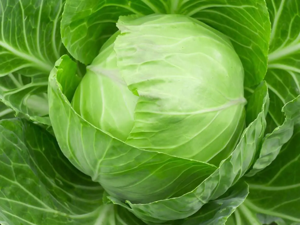

In [8]:
# download and view cabbage photos
download_url(search_images('Cabbage photo', 2)[0],
             'test_cabbage.jpg',
             show_progress=False
            )
Image.open('test_cabbage.jpg').to_thumb(300,300)

Search for 'Brocolli photos'


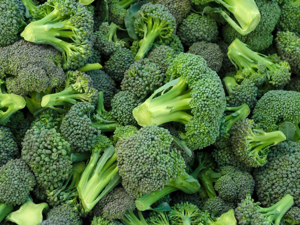

In [9]:
# download and view brocolli photos
download_url(search_images('Brocolli photos', 2)[0],
             'test_brocolli.jpg',
             show_progress=False
            )
Image.open('test_brocolli.jpg').to_thumb(300,300)

Search for 'Kale photos'


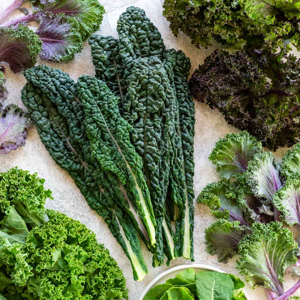

In [10]:
# download and view kale photos
download_url(search_images('Kale photos', 2)[1],
             'test_kale.jpg',
             show_progress=False
            )
Image.open('test_kale.jpg').to_thumb(300,300)

The search is working fine. Now let's save a few images for each vegetable category. Each category in each own folder.

In [11]:
??download_images

In [12]:
# our vegetable search
searches = "cabbage", "lettuce", "spinach", "kales", "brocolli"

path = Path("vegetables")

from time import sleep

for veggie in searches:
    dest = (path/veggie) # folder e.g. /vegetables/cabbage
    dest.mkdir(exist_ok=True, parents=True) # create the folder
    
    download_images(dest, urls=search_images(f"{veggie} photo")) # download images
    sleep(10) # pause between downloads
    
    download_images(dest, urls=search_images(f"{veggie} transparent photo")) # download images
    sleep(10)
    
    download_images(dest, urls=search_images(f"{veggie} plant photo")) # download images
    sleep(10)
    
    resize_images(path/veggie, max_size=224, dest=path/veggie)
    

Search for 'cabbage photo'
Search for 'cabbage transparent photo'
Search for 'cabbage plant photo'


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Search for 'lettuce photo'
Search for 'lettuce transparent photo'
Search for 'lettuce plant photo'


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Search for 'spinach photo'
Search for 'spinach transparent photo'
Search for 'spinach plant photo'


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Search for 'kales photo'
Search for 'kales transparent photo'
Search for 'kales plant photo'
Search for 'brocolli photo'
Search for 'brocolli transparent photo'
Search for 'brocolli plant photo'


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
??FastDownload

Object `FastDownload` not found.


**Minor Clean-up**
Some images could have failed. Let's remove them, otherwise our model will fail.

In [14]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

1

In [15]:
print(1+1)

2


## **Training the model**
We need to train a model. We will use `DataLoaders` from `fastai`. `DataLoaders` is an object containing _training set_ and _validation set_.

From `fastai` we will use `DataBlock` and view a few images from it, as follows:


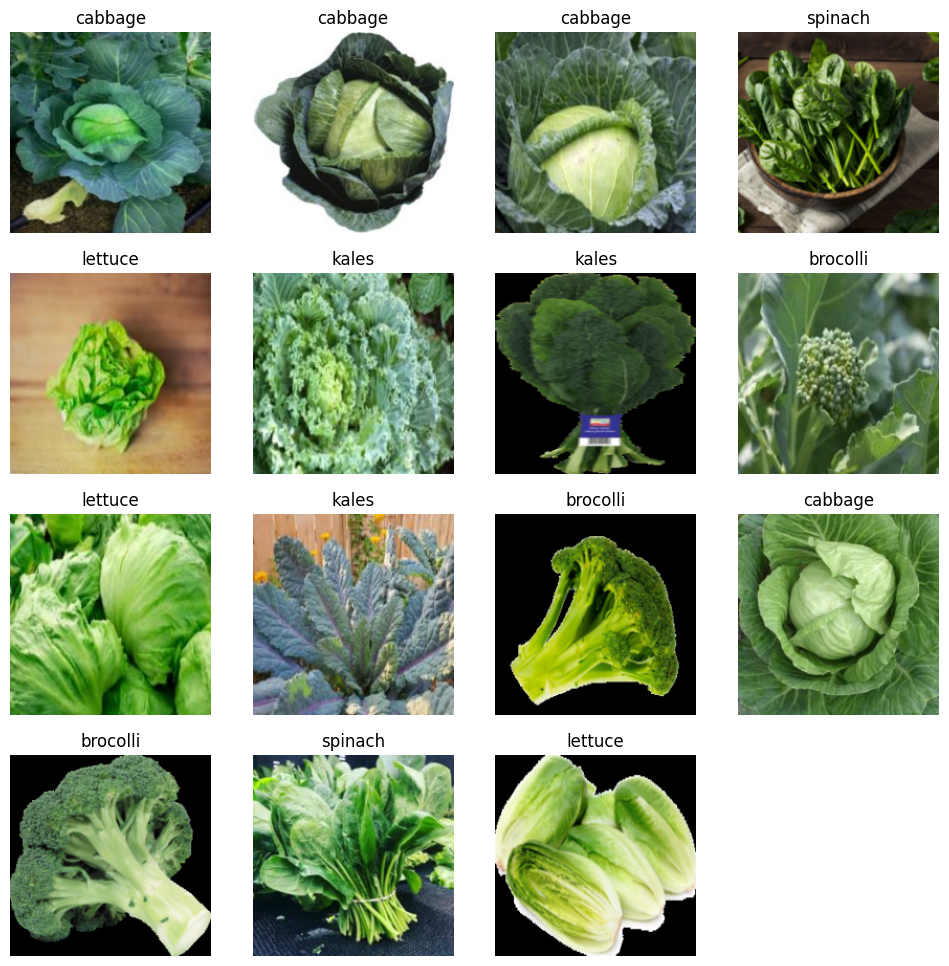

In [16]:
#dls = DataBlock(blocks=(ImageBlock, CategoryBlock),get_items=get_image_files,
 #                       splitter=RandomSplitter(valid_pct=0.2, seed=42),
 #                       get_y=parent_label,
 #                       item_tfms=[Resize(192, method="squish")]
 #                      ).dataloaders(path, bs=32)

# dls.show_batch(max_n=32)

vegies = DataBlock(blocks=(ImageBlock, CategoryBlock), get_items=get_image_files,
                  splitter=RandomSplitter(valid_pct=0.2, seed=42),
                  get_y=parent_label,
                  item_tfms=[Resize(192, method="squish")])
dataloaders = vegies.dataloaders(path, bs=32)

dataloaders.valid.show_batch(max_n=15, nrows=4)

In [17]:
vegies = vegies.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))

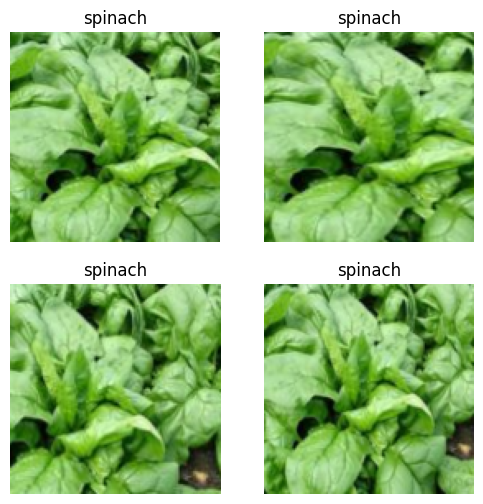

In [18]:
dataloaders = vegies.dataloaders(path)
dataloaders.show_batch(max_n=4, nrows=2, unique=True)

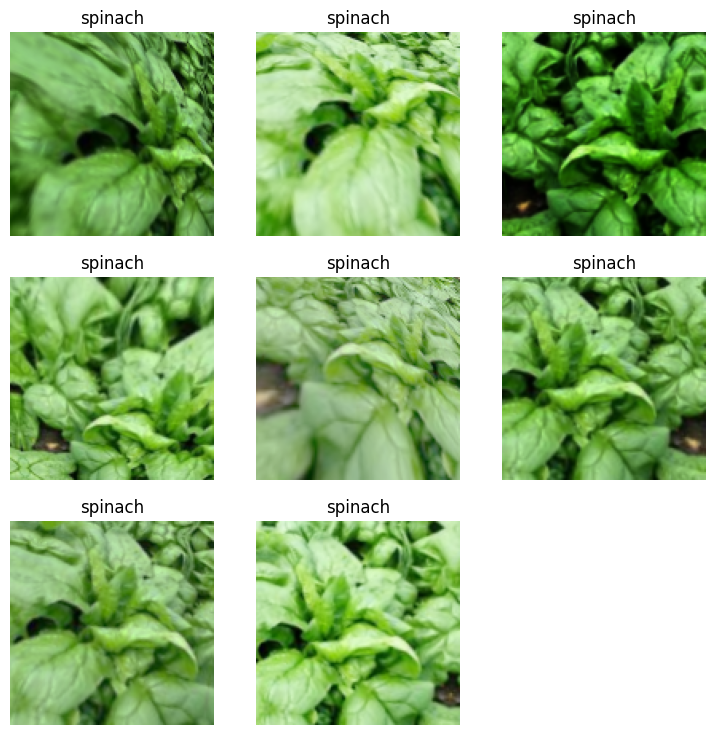

In [19]:
vegies = vegies.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dataloaders = vegies.dataloaders(path)
dataloaders.show_batch(max_n=8, nrows=3, unique=True)

In [20]:
vegies = vegies.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
                   batch_tfms=aug_transforms())
dataloaders = vegies.dataloaders(path)

In [21]:
learn = vision_learner(dataloaders, resnet18, metrics=error_rate)
learn.fine_tune(9)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 74.5MB/s]


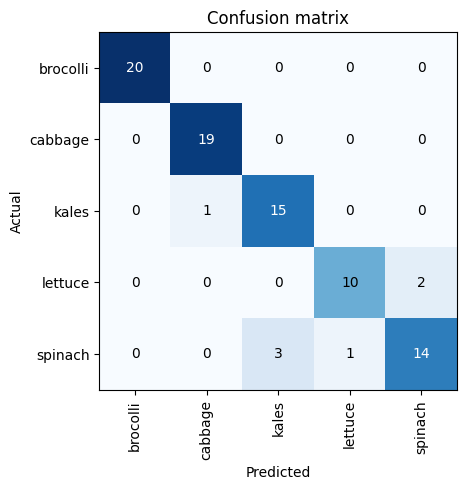

In [22]:
interpretation = ClassificationInterpretation.from_learner(learn)
interpretation.plot_confusion_matrix()

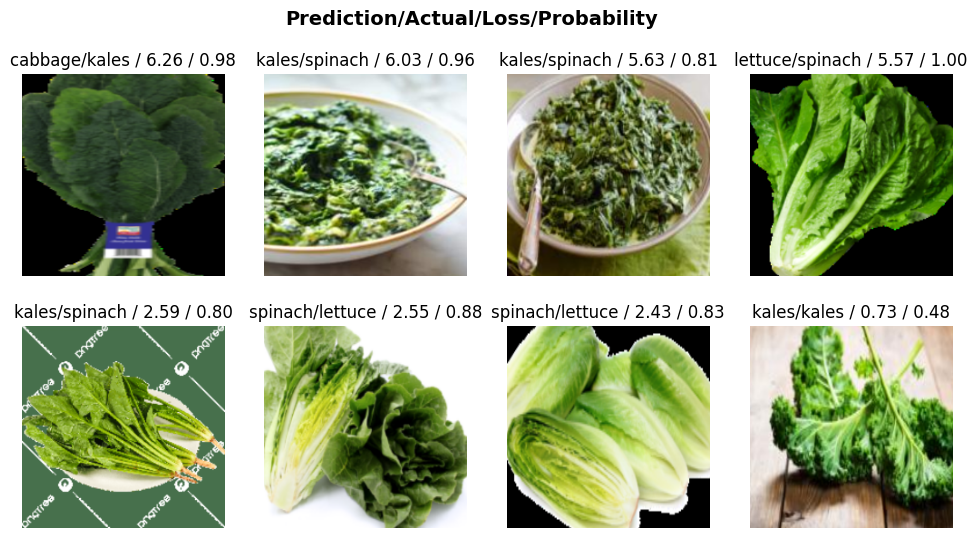

In [23]:
interpretation.plot_top_losses(8, nrows=2) # where the loss is the highest
# loss is the measurement of how good our model is at predicting

In [24]:
from fastai.vision.widgets import *

# using the trained model to clean up data. Reduce mistakes in predicting
cleaner = ImageClassifierCleaner(learn)
cleaner

In [25]:
# delete all images marked with <delete> in the widget
for idx in cleaner.delete():
    cleaner.fns[idx].unlink()
    
# move the images found in the wrong category during cleanup
for index, category in cleaner.change():
    shutil.move(str(cleaner.fns[index]), path/category)

This far, we have cleaned up the data. We should probably retrain the model, to check if it has improved.

In [26]:
vegiesDatablock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                           get_items=get_image_files,
                           splitter=RandomSplitter(valid_pct=0.2, seed=42),
                           get_y=parent_label,
                           item_tfms=[RandomResizedCrop(224, min_scale=0.5)],
                            batch_tfms=aug_transforms()
                           ).dataloaders(path)

learner_clean = vision_learner(vegiesDatablock, models.resnet34, metrics=error_rate)

learner_clean.fine_tune(6)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 81.7MB/s]


Now that the model is trained. Let us put it to test. We will check what it thinks about the images of the various vegetables we downloaded earlier.

Test a cabbage.

In [27]:
is_cabbage,_,probs = learn.predict(PILImage.create('test_cabbage.jpg'))

print(f"This is a: {is_cabbage}")
print(f"Probability it is a cabbage: {probs[1]:.4f}")

This is a: cabbage
Probability it is a cabbage: 0.9999


Test brocolli.

In [28]:
is_brocolli,_,probs = learn.predict(PILImage.create('test_brocolli.jpg'))

print(f"This is a: {is_brocolli}")
print(f"Probability it is a brocolli: {probs[0]:.4f}")

This is a: brocolli
Probability it is a brocolli: 1.0000


Test its a spinach

In [29]:
is_spinach,_,probs = learn.predict(PILImage.create('test_spinach.jpg'))

print(f"This is a: {is_spinach}")
print(f"Probability it is a spinach: {probs[4]:.4f}")

This is a: spinach
Probability it is a spinach: 0.9865


Test it can classify kale as kale.

In [30]:
is_kale,_,probs = learn.predict(PILImage.create('test_kale.jpg'))

print(f"This is a: {is_kale}")
print(f"Probability it is a kale: {probs[2]:.4f}")

This is a: kales
Probability it is a kale: 0.6750


Test it can classify lettuce.

In [31]:
is_lettuce,_,probs = learn.predict(PILImage.create('test-lettuce.jpg'))

print(f"This is a: {is_lettuce}")
print(f"Probability it is a lettuce: {probs[3]:.4f}")

This is a: lettuce
Probability it is a lettuce: 0.6874


Clearly, this is amazing improvements. The model's performance has signficantly improved. Some challenges are still notable especially identifying lettuce and kales. This is a problem with dataset more than the model.

Let's download the model as-is now.

In [32]:
learner_clean.export('model.pkl')

Let's try to use our saved model for prediction.

In [33]:
# Model Inference - Is it a cabbage?
learner_inference = load_learner(Path('model.pkl'))
learner_inference.predict('test_cabbage.jpg')

('cabbage',
 tensor(1),
 tensor([7.3776e-07, 9.9999e-01, 3.7101e-07, 3.0053e-07, 1.1265e-05]))

In [34]:
learner_inference.dls.vocab

['brocolli', 'cabbage', 'kales', 'lettuce', 'spinach']

**Brilliant**
There we go. This model can be used to classify cabbage, lettuce, brocolli, spinach, and kale.

More features to come:
- train model on other veggies
- prepare model for deployment (further training and finetuning)
- figure out how to understand what is going on and what tweaks I can make. _Maybe also learn why I should not do some things_.


_sign-off()_